<a href="https://colab.research.google.com/github/varun-beep/DeepLearning/blob/main/Time_Series_Prediction_using_LSTM(8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv2D, TimeDistributed, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

***Load CIFAR-10 dataset***

In [2]:
(train_images, _), (test_images, _) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


***Convert to grayscale (Extract brightness)***

In [3]:
train_gray = np.mean(train_images, axis=-1, keepdims=True) / 255.0
test_gray = np.mean(test_images, axis=-1, keepdims=True) / 255.0

***Resize images to 16x16 for efficiency***

In [4]:
train_gray = tf.image.resize(train_gray, (16, 16))
test_gray = tf.image.resize(test_gray, (16, 16))

***Prepare sequences (sequence_length = 5)***

In [5]:
sequence_length = 5
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_gray, sequence_length)
X_test, y_test = create_sequences(test_gray, sequence_length)

***Reshape for LSTM input (samples, time steps, height, width, channels)***

In [6]:

X_train = X_train.reshape(-1, sequence_length, 16, 16, 1)
X_test = X_test.reshape(-1, sequence_length, 16, 16, 1)

***Model: TimeDistributed Conv2D + LSTM***

In [7]:
model = Sequential([
    TimeDistributed(Conv2D(16, (3, 3), activation='relu', padding='same'), input_shape=(sequence_length, 16, 16, 1)),
    TimeDistributed(GlobalAveragePooling2D()),
    LSTM(32, return_sequences=False),
    Dense(256, activation='relu'),  # **FIXED OUTPUT SHAPE**
    Dense(256, activation='sigmoid')  # **Corrected to match 16x16 = 256**
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Compile Model***

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

***Train Model***

In [9]:
model.fit(X_train, y_train.reshape(-1, 256), epochs=5, batch_size=32, validation_data=(X_test, y_test.reshape(-1, 256)))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - loss: 0.0527 - val_loss: 0.0523
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - loss: 0.0524 - val_loss: 0.0522
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 0.0527 - val_loss: 0.0523
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - loss: 0.0526 - val_loss: 0.0522
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 0.0524 - val_loss: 0.0523


***Test Model***

In [10]:
predicted_brightness = model.predict(X_test[:1]).reshape(16, 16)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


***Plot Actual vs Predicted Brightness***

(np.float64(-0.5), np.float64(15.5), np.float64(15.5), np.float64(-0.5))

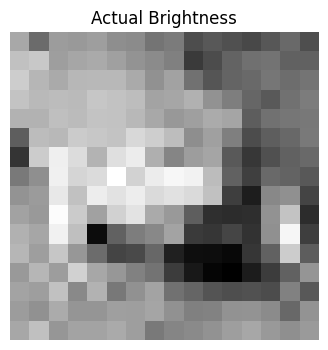

In [11]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(y_test[0].reshape(16, 16), cmap='gray')
plt.title("Actual Brightness")
plt.axis("off")

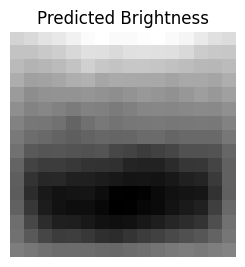

In [12]:
plt.subplot(1, 2, 2)
plt.imshow(predicted_brightness, cmap='gray')
plt.title("Predicted Brightness")
plt.axis("off")

plt.show()